In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
true = os.listdir('/content/drive/MyDrive/Cardiomegaly Disease Prediction/test/true')
false = os.listdir('/content/drive/MyDrive/Cardiomegaly Disease Prediction/test/false')

In [18]:
print(len(true))
print(len(false))

557
557


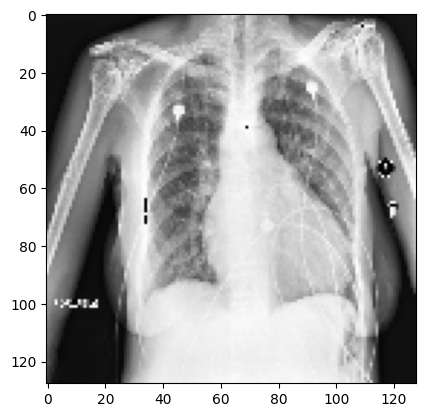

In [19]:
image = cv2.imread(os.path.join('/content/drive/MyDrive/Cardiomegaly Disease Prediction/test/true',true[0]))
plt.imshow(image)

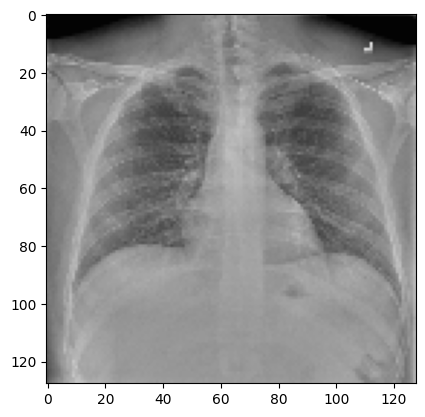

In [20]:
image = cv2.imread(os.path.join('/content/drive/MyDrive/Cardiomegaly Disease Prediction/test/false',false[0]))
plt.imshow(image)

In [21]:
image.shape

(128, 128, 3)

In [22]:
true = true[:400]
false = false[:400]

In [23]:
print(len(true))
print(len(false))

400
400


# **Getting Data Ready**

In [24]:
X = np.empty([1,128,128,3])
Y = []

In [25]:
for i in true:
  image = cv2.imread(os.path.join('/content/drive/MyDrive/Cardiomegaly Disease Prediction/test/true',i))
  image = cv2.resize(image,(128,128))
  image = image.reshape([1,128,128,3])
  X = np.concatenate((X,image),axis=0)
  Y.append(1)

for i in false:
  image = cv2.imread(os.path.join('/content/drive/MyDrive/Cardiomegaly Disease Prediction/test/false',i))
  image = cv2.resize(image,(128,128))
  image = image.reshape([1,128,128,3])
  X = np.concatenate((X,image),axis=0)
  Y.append(0)

In [26]:
Y = np.array(Y)

In [27]:
Y.shape

(800,)

In [28]:
X.shape

(801, 128, 128, 3)

In [29]:
X = X[1:]

In [30]:
X.shape

(800, 128, 128, 3)

# **Data Preprocessing**

In [31]:
X.min()

0.0

In [32]:
X.max()

255.0

In [33]:
X = X/255

In [34]:
X.min()

0.0

In [35]:
X.max()

1.0

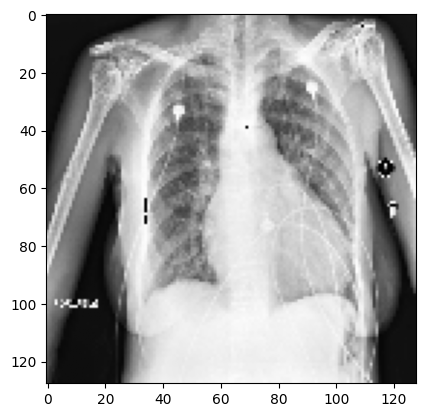

In [36]:
plt.imshow(X[0])

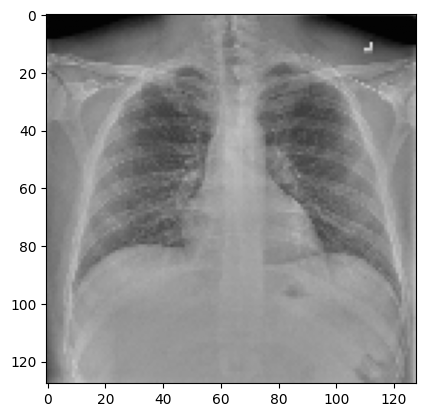

In [37]:
plt.imshow(X[400])

# **Train Test Split**

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [39]:
X_train.shape

(640, 128, 128, 3)

In [40]:
Y_train.shape

(640,)

# **Model Preparation**

In [41]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

In [84]:
model = Sequential()
model.add(Conv2D(kernel_size = (3,3),filters=48,activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(kernel_size = (3,3),filters=48,activation='relu'))
model.add(Conv2D(kernel_size = (3,3),filters=48,activation='relu'))
model.add(Conv2D(kernel_size = (3,3),filters=48,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(48,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(48,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(48,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(48,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 48)      1344      
                                                                 
 conv2d_22 (Conv2D)          (None, 124, 124, 48)      20784     
                                                                 
 conv2d_23 (Conv2D)          (None, 122, 122, 48)      20784     
                                                                 
 conv2d_24 (Conv2D)          (None, 120, 120, 48)      20784     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 48)       0         
 2D)                                                             
                                                                 
 batch_normalization_14 (Bat  (None, 60, 60, 48)       192       
 chNormalization)                                     

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',patience = 10)

In [87]:
model.fit(X_train,Y_train,validation_data = [X_test,Y_test],callbacks=[earlystop],batch_size = 100, epochs=100)

Epoch 1/100
7/7 [==============================] - 152s 21s/step - loss: 0.8576 - accuracy: 0.5641 - val_loss: 0.7037 - val_accuracy: 0.5813
Epoch 2/100
7/7 [==============================] - 145s 20s/step - loss: 0.6271 - accuracy: 0.6609 - val_loss: 0.8559 - val_accuracy: 0.5188
Epoch 3/100
7/7 [==============================] - 145s 21s/step - loss: 0.5346 - accuracy: 0.7266 - val_loss: 1.1202 - val_accuracy: 0.5312
Epoch 4/100
7/7 [==============================] - 145s 21s/step - loss: 0.5009 - accuracy: 0.7531 - val_loss: 1.4641 - val_accuracy: 0.5312
Epoch 5/100
7/7 [==============================] - 145s 21s/step - loss: 0.4680 - accuracy: 0.7891 - val_loss: 1.0929 - val_accuracy: 0.5375
Epoch 6/100
7/7 [==============================] - 144s 20s/step - loss: 0.4052 - accuracy: 0.8484 - val_loss: 1.1165 - val_accuracy: 0.5125
Epoch 7/100
7/7 [==============================] - 145s 21s/step - loss: 0.3858 - accuracy: 0.8328 - val_loss: 0.7674 - val_accuracy: 0.5188
Epoch 8/100
7

<Axes: >

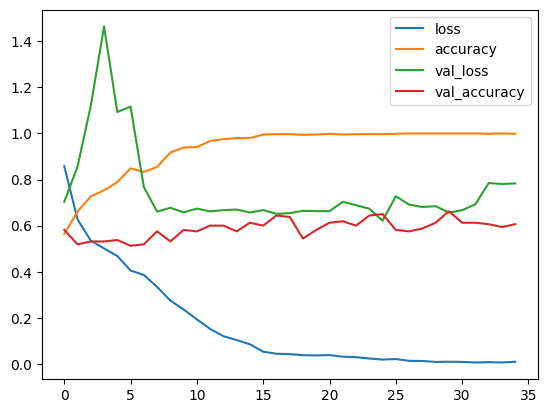

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [89]:
Y_pred = np.round(model.predict(X))

25/25 [==============================] - 43s 2s/step


In [90]:
from sklearn.metrics import classification_report

print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       400
           1       0.82      0.89      0.85       400

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800



In [91]:
model.save('/content/drive/MyDrive/Cardiomegaly Disease Prediction/CNN2.h5')